**Decision Tree Using Gini Impurity and Information Gain**

In [35]:
import pandas as pd

# Define the dataset with columns for Sepal Length, Sepal Width, Petal Length, Petal Width, and Class
data = [
    [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
    [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
    [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
    [6.3, 3.3, 6.0, 2.5, 'Iris-virginica'],
    [5.8, 2.7, 5.1, 1.9, 'Iris-virginica'],
    [7.1, 3.0, 5.9, 2.1, 'Iris-virginica']
]

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(data, columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"])
df


,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,6.3,3.3,6.0,2.5,Iris-virginica
4,5.8,2.7,5.1,1.9,Iris-virginica
5,7.1,3.0,5.9,2.1,Iris-virginica


In [36]:
# Function to calculate Gini Impurity for a split dataset
def gini_impurity(groups, classes):
    # Count all samples
    n_instances = sum([len(group) for group in groups])
    gini = 0.0
    # Calculate Gini for each group
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        # Score the group based on the class proportions
        for class_val in classes:
            proportion = [row[-1] for row in group].count(class_val) / size
            score += proportion ** 2
        gini += (1 - score) * (size / n_instances)
    return gini

    # Function to calculate Information Gain
def information_gain(groups, classes, current_uncertainty):
    n_instances = sum([len(group) for group in groups])
    weighted_uncertainty = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            proportion = [row[-1] for row in group].count(class_val) / size
            score += proportion ** 2
        weighted_uncertainty += (1 - score) * (size / n_instances)
    return current_uncertainty - weighted_uncertainty

# Function to split the dataset based on a feature and a threshold
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Define the classes in the dataset
classes = list(df['Class'].unique())
dataset = df.values.tolist()
# Find the best split
def get_best_split(dataset, classes, criterion="gini"):
    best_index, best_value, best_score, best_groups = None, None, float('inf'), None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            if criterion == "gini":
                score = gini_impurity(groups, classes)
            elif criterion == "info_gain":
                current_uncertainty = gini_impurity([dataset], classes)  # for simplicity
                score = information_gain(groups, classes, current_uncertainty)
            if score < best_score:
                best_index, best_value, best_score, best_groups = index, row[index], score, groups
    return {'index': best_index, 'value': best_value, 'groups': best_groups}

# Find best split using Gini Impurity
best_split_gini = get_best_split(dataset, classes, criterion="gini")
print("Best Split (Gini):", best_split_gini)

# Find best split using Information Gain
best_split_info_gain = get_best_split(dataset, classes, criterion="info_gain")
print("Best Split (Information Gain):", best_split_info_gain)


Best Split (Gini): {'index': 0, 'value': 5.8, 'groups': ([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa']], [[6.3, 3.3, 6.0, 2.5, 'Iris-virginica'], [5.8, 2.7, 5.1, 1.9, 'Iris-virginica'], [7.1, 3.0, 5.9, 2.1, 'Iris-virginica']])}
Best Split (Information Gain): {'index': 0, 'value': 4.7, 'groups': ([], [[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [6.3, 3.3, 6.0, 2.5, 'Iris-virginica'], [5.8, 2.7, 5.1, 1.9, 'Iris-virginica'], [7.1, 3.0, 5.9, 2.1, 'Iris-virginica']])}


**Alternative 2: Decision Tree Using Gini Impurity and Information Gain**

In [28]:
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeFromScratch:
    def __init__(self, criterion="gini"):
        self.root = None
        self.criterion = criterion

    def gini(self, y):
        classes = np.unique(y)
        total_samples = len(y)
        impurity = 1.0

        for c in classes:
            p_c = len(y[y == c]) / total_samples
            impurity -= p_c ** 2
        return impurity

    def entropy(self, y):
        classes = np.unique(y)
        total_samples = len(y)
        entropy = 0.0

        for c in classes:
            p_c = len(y[y == c]) / total_samples
            if p_c > 0:
                entropy -= p_c * np.log2(p_c)
        return entropy

    def information_gain(self, parent, left_child, right_child):
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)

        if self.criterion == "gini":
            gain = self.gini(parent) - (weight_left * self.gini(left_child) +
                                      weight_right * self.gini(right_child))
        else:
            gain = self.entropy(parent) - (weight_left * self.entropy(left_child) +
                                         weight_right * self.entropy(right_child))
        return gain

    def split(self, X, y, feature, threshold):
        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def find_best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None

        n_features = X.shape[1]

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self.split(X, y, feature, threshold)

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                gain = self.information_gain(y, y_left, y_right)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0, max_depth=5):
        n_samples = len(y)
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (n_classes == 1 or depth >= max_depth or n_samples < 2):
            leaf_value = np.argmax(np.bincount(y))
            return Node(value=leaf_value)

        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            leaf_value = np.argmax(np.bincount(y))
            return Node(value=leaf_value)

        X_left, X_right, y_left, y_right = self.split(X, y, best_feature, best_threshold)

        left_subtree = self.build_tree(X_left, y_left, depth + 1, max_depth)
        right_subtree = self.build_tree(X_right, y_right, depth + 1, max_depth)

        return Node(best_feature, best_threshold, left_subtree, right_subtree)

    def fit(self, X, y, max_depth=5):
        self.root = self.build_tree(X, y, max_depth=max_depth)

    def predict_single(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self.predict_single(x, node.left)
        return self.predict_single(x, node.right)

    def predict(self, X):
        return np.array([self.predict_single(x, self.root) for x in X])

# Example usage with the iris dataset
iris_data = np.array([
    [5.1, 3.5, 1.4, 0.2, 0],  # Iris-setosa
    [4.9, 3.0, 1.4, 0.2, 0],  # Iris-setosa
    [4.7, 3.2, 1.3, 0.2, 0],  # Iris-setosa
    [6.3, 3.3, 6.0, 2.5, 1],  # Iris-virginica
    [5.8, 2.7, 5.1, 1.9, 1],  # Iris-virginica
    [7.1, 3.0, 5.9, 2.1, 1]   # Iris-virginica
])

X = iris_data[:, :-1]
y = iris_data[:, -1].astype(int)

# Train with Gini impurity
tree_gini = DecisionTreeFromScratch(criterion="gini")
tree_gini.fit(X, y)

# Train with Information Gain
tree_entropy = DecisionTreeFromScratch(criterion="entropy")
tree_entropy.fit(X, y)

# Make predictions
predictions_gini = tree_gini.predict(X)
predictions_entropy = tree_entropy.predict(X)

print("Gini Predictions:", predictions_gini)
print("Entropy Predictions:", predictions_entropy)

Gini Predictions: [0 0 0 1 1 1]
Entropy Predictions: [0 0 0 1 1 1]


**Part 1: Heart Disease Prediction Models**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Download and load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
           "oldpeak", "slope", "ca", "thal", "num"]
data = pd.read_csv(url, names=columns)

# Basic preprocessing steps
data.replace('?', np.nan, inplace=True)
data = data.dropna()  # Drop rows with missing values
data["num"] = data["num"].apply(lambda x: 1 if x > 0 else 0)  # Convert 'num' to binary


In [ ]:

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
           "oldpeak", "slope", "ca", "thal", "num"]
data = pd.read_csv(url, names=columns)

# Replace missing values marked with '?' in dataset
data.replace('?', float('nan'), inplace=True)
data = data.dropna()  # Drop rows with missing values
data["num"] = data["num"].apply(lambda x: 1 if x > 0 else 0)  # Convert 'num' to binary


Decision Tree Model with 10-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="num")
y = data["num"]

# Use 10-fold cross-validation later in the models

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier()


In [ ]:
from sklearn.metrics import make_scorer

# Custom scorer for F1, Accuracy, and AUROC
f1 = cross_val_score(dt_model, X, y, cv=10, scoring=make_scorer(f1_score))
accuracy = cross_val_score(dt_model, X, y, cv=10, scoring=make_scorer(accuracy_score))
auroc = cross_val_score(dt_model, X, y, cv=10, scoring="roc_auc")

print("Decision Tree Performance:")
print("F1 Score:", f1.mean())
print("Accuracy:", accuracy.mean())
print("AUROC:", auroc.mean())


Decision Tree Performance:
F1 Score: 0.7107023274077247
Accuracy: 0.7374712643678161
AUROC: 0.742548076923077


Random Forest Model with 10-Fold Cross-Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
f1 = cross_val_score(rf_model, X, y, cv=10, scoring=make_scorer(f1_score))
accuracy = cross_val_score(rf_model, X, y, cv=10, scoring=make_scorer(accuracy_score))
auroc = cross_val_score(rf_model, X, y, cv=10, scoring="roc_auc")

print("Random Forest Performance:")
print("F1 Score:", f1.mean())
print("Accuracy:", accuracy.mean())
print("AUROC:", auroc.mean())


Random Forest Performance:
F1 Score: 0.8052280503767181
Accuracy: 0.8280459770114943
AUROC: 0.9014079670329671


Boosting Model with 10-Fold Cross-Validation

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Initialize the XGBClassifier without the deprecated parameter
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)

# Calculate F1 Score, Accuracy, and AUROC with cross-validation
f1 = cross_val_score(xgb_model, X, y, cv=10, scoring=make_scorer(f1_score))
accuracy = cross_val_score(xgb_model, X, y, cv=10, scoring=make_scorer(accuracy_score))
auroc = cross_val_score(xgb_model, X, y, cv=10, scoring="roc_auc")

print("Boosting Model Performance:")
print(f"F1 Score: {f1.mean()}")
print(f"Accuracy: {accuracy.mean()}")
print(f"AUROC: {auroc.mean()}")


Boosting Model Performance:
F1 Score: 0.7632134181173693
Accuracy: 0.7909195402298852
AUROC: 0.8854052197802199


Models Performance Comparison:

F1 Score:
Random Forest has the highest F1 score at 0.81, indicating it balances precision and recall better than the other models.
Boosting achieves a slightly lower F1 score (0.76) but still outperforms the Decision Tree (0.71).

Accuracy:
Random Forest again has the highest accuracy at 0.83, followed by Boosting (0.79) and then the Decision Tree (0.74). This means Random Forest is the most accurate in predicting the correct diagnosis of heart disease.

AUROC:
Random Forest achieves the highest AUROC of 0.90, indicating a strong ability to distinguish between the classes.
Boosting also performs well with an AUROC of 0.89, while the Decision Tree model lags behind at 0.74.

Conclusion:

Overall, the Random Forest model consistently outperforms the Decision Tree and Boosting models across all three metrics (F1 Score, Accuracy, and AUROC), making it the best model among the three for this dataset. Boosting also performs well but falls slightly short of Random Forest, especially in terms of F1 Score and AUROC. The Decision Tree, while functional, has the lowest performance, which is often expected for single trees compared to ensemble methods like Random Forest and Boosting.

**Part 2: Clustering on Heart Disease Dataset**

Implement K-Means Clustering

In [24]:
import numpy as np

def initialize_centroids(X, k):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    return centroids

def assign_clusters(X, centroids):
    # Calculate Euclidean distance between each data point and centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    # Update centroids by computing the mean of each cluster
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, iterations=100):
    # Check if X is 2D, reshape if necessary
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    centroids = initialize_centroids(X, k)
    for _ in range(iterations):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Test data (ensure X is a 2D array)
X = [[1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0], [1.0, 0.6], [9.0, 11.0]]
X_array = np.array(X)
k = 2  # Number of clusters
labels, centroids = kmeans(X_array, k)

# Output
print("Labels:", labels)
print("Centroids:", centroids)


Labels: [0 0 1 1 0 1]
Centroids: [[1.16666667 1.46666667]
 [7.33333333 9.        ]]


Visualize K-Means Results

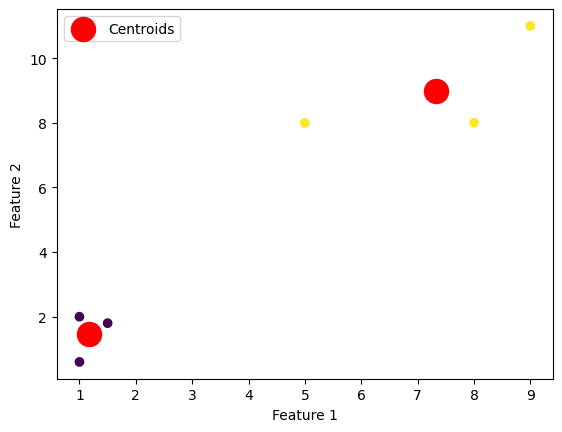

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X_array[:, 0], X_array[:, 1], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c="red", label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Spectral Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


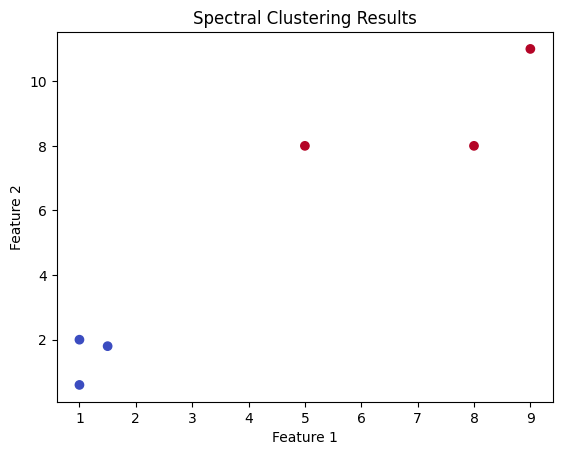

In [27]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Define number of clusters and neighbors
k = 2  # Number of clusters
n_neighbors = 3  # Set neighbors <= number of samples

# Initialize and fit the Spectral Clustering model
spectral_model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors=n_neighbors)
spectral_labels = spectral_model.fit_predict(X_array)

# Visualize Spectral Clustering results
plt.scatter(X_array[:, 0], X_array[:, 1], c=spectral_labels, cmap="coolwarm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spectral Clustering Results")
plt.show()
